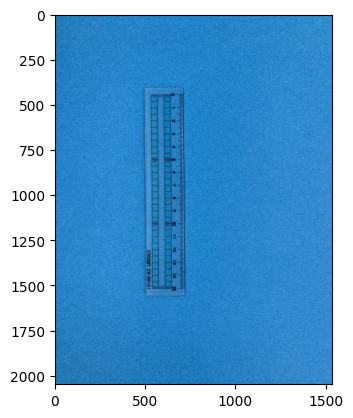

In [10]:
#pixel数で判断する
#定規の画像から1pixelの長さ，1cmがなんpixelかを求める

#10cm = 411.2383736958408 pixel

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/home/data/1216_jikunashi/IMG_1938.JPEG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

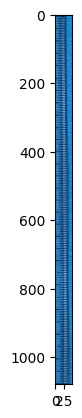

In [11]:
# pixel数で判断する
# 定規の画像から1pixelの長さ，1cmがなんpixelかを求める

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
# image = cv2.imread("/home/data/1009_jogi/IMG_1637.JPEG")

# クロップする領域を指定 (例: x=100, y=100, width=200, height=200)
x, y, w, h = 680, 440, 50, 1080
cropped_image = image[y:y+h, x:x+w]
plt.imshow(image)
# クロップした画像を表示
plt.imshow(cropped_image)
# plt.title("Cropped Image")
# plt.axis('off')
plt.show()
#15cm = 1080
#1cm = 72

In [12]:
# import math
# p = math.sqrt(14**2 + 411**2)
# print(p)

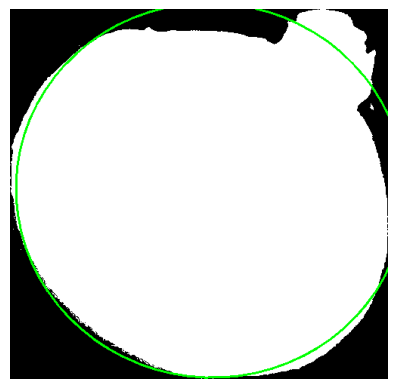

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 実際の画像で実験
image = cv2.imread("/home/data/1216_jikuari/cropBB/C/IMG_1734.JPEG")

mask_img = cv2.imread("/home/data/1216_jikuari/maskBB/C/IMG_1734.JPEG", cv2.IMREAD_GRAYSCALE)
_, mask_img = cv2.threshold(mask_img, 128, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_counter = max(contours, key=cv2.contourArea)

ellipse = cv2.fitEllipse(max_counter)
center = (int(ellipse[0][0]), int(ellipse[0][1]))
axes = (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2))  # 半径は長径と短径の半分

# マスク画像に楕円を描画
output_image = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2BGR)
cv2.ellipse(output_image, ellipse, (0, 255, 0), 2)  # 楕円を緑色で描画

# 結果を表示する
plt.imshow(output_image)
plt.axis('off')
plt.show()

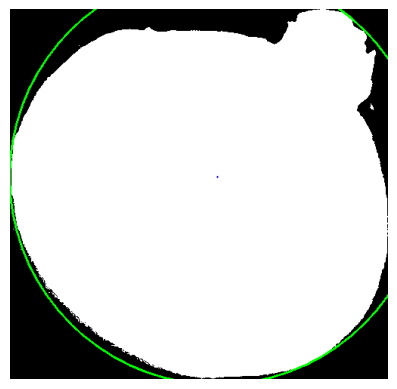

In [14]:
#真円，楕円フィッティングの結果を表示
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 真円フィッティングを行うかどうかのフラグ

# マスク画像を読み込む
mask_image = cv2.imread('/home/data/1216_jikuari/maskBB/C/IMG_1734.JPEG', cv2.IMREAD_GRAYSCALE)
_,mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出する
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # 最大の輪郭を選択する
    largest_contour = max(contours, key=cv2.contourArea)


    # 真円をフィッティングする
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(x), int(y))
    radius = int(radius)
    shape_mask = np.zeros_like(mask_image)
    cv2.circle(shape_mask, center, radius, 255, -1)

    # 一致率を計算する
    intersection = cv2.bitwise_and(mask_image, shape_mask)
    union = cv2.bitwise_or(mask_image, shape_mask)
    intersection_area = np.sum(intersection == 255)
    union_area = np.sum(union == 255)
    iou = intersection_area / union_area
    

    # 結果を表示する
    output_image = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2BGR)

    cv2.circle(output_image, center, radius, (0, 255, 0), 2)
    cv2.circle(output_image, center, 1, (0, 0, 255), -1)
    # plt.title(f'Center: {center}, Radius: {radius}, IoU: {iou:.2f}')

    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

    # print(f"真円の中心: {center}")
    # print(f"真円の半径: {radius}")
    # print(f"一致率 (IoU): {iou:.2f}")

In [15]:
# シイタケ画像に円を当てはめて一致率を判定
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
filename = "1008"

folder_lists = [
    f"/home/data/{filename}/mask"
]

# 真円フィッティングを行うかどうかのフラグ
fit_circle = True # Trueなら真円、Falseなら楕円
jusin = False

for folder_path in folder_lists:
    folder_name = folder_path.split("/")[-1]
    output_file = f'/home/src/round_attach_result/{filename}_mask_result.txt'
    img_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    results = [f"Folder: {folder_name}\n"]
    
    for img_file in img_files:
        # print(f"Processing {img_file}")
        mask_img  = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        _, mask_img = cv2.threshold(mask_img, 128, 255, cv2.THRESH_BINARY)
        counters, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if counters:
            max_counter = max(counters, key=cv2.contourArea)
        
        if fit_circle and not jusin:#真円
            (x,y), radius = cv2.minEnclosingCircle(max_counter)
            center = (int(x), int(y))
            radius = int(radius)
            shape_mask = np.zeros_like(mask_img)
            cv2.circle(shape_mask, center, radius, 255, -1)
        
        if fit_circle and jusin:#真円＋重心
                (x, y), radius = cv2.minEnclosingCircle(max_counter)
                # 重心を計算する            
                M = cv2.moments(max_counter)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                else:
                    cX, cY = 0, 0
                center = (cX, cY)
                radius = int(radius)
                shape_mask = np.zeros_like(mask_img)
                cv2.circle(shape_mask, center, radius, 255, -1)
        
        if not fit_circle:#楕円
                ellipse = cv2.fitEllipse(max_counter)
                center = (int(ellipse[0][0]), int(ellipse[0][1]))
                axes = (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2))  # 半径は長径と短径の半分
                shape_mask = np.zeros_like(mask_img)
                cv2.ellipse(shape_mask, ellipse, 255, -1)
        
        intersection = cv2.bitwise_and(mask_img, shape_mask)
        union = cv2.bitwise_or(mask_img, shape_mask)
        intersection_area = np.sum(intersection == 255)
        union_area = np.sum(union == 255)
        iou = intersection_area / union_area
        
        if fit_circle:
            results.append(f"File: {os.path.basename(img_file)}, Center: {center}, Radius: {radius}, IoU: {iou:.2f}\n")
        else:
            results.append(f"File: {os.path.basename(img_file)}, Center: {center}, Axes: {axes}, IoU: {iou:.2f}\n")        
    with open(output_file, 'w') as f:
        f.writelines(results)
    

In [16]:
def find_bounds_8_directions(image, center):
    directions = {
        "上下": [(-1, 0), (1, 0)],  # 上下
        "左右": [(0, -1), (0, 1)],  # 左右
        "左上右下": [(-1, -1), (1, 1)],  # 左上、右下
        "右上左下": [(-1, 1), (1, -1)]  # 右上、左下
    }
    
    bounds = {}
    for direction_name, direction_pairs in directions.items():
        total_distance = 0
        for dy, dx in direction_pairs:
            y, x = center
            distance = 0
            while 0 <= y < image.shape[0] and 0 <= x < image.shape[1] and image[y, x] != 0:
                y += dy
                x += dx
                distance += 1
            total_distance += distance
        bounds[direction_name] = total_distance
    
    return bounds

def calculate_diameter(center, distance):
    return distance * 2

def main():
    result_file = '/home/src/round_attach_result/1008_mask_result.txt'
    image_folder = '/home/data/1008/mask'
    output_file = '/home/src/round_attach_result/val&std_size.txt'
    centers = read_mask_result(result_file)
    with open(output_file, 'w') as f:
        for file_name, center in centers.items():
            image_path = os.path.join(image_folder, file_name)
            
            if image_path is None:
                raise FileNotFoundError(f"Image not found: {image_path}")

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # 2値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

            # 8方向で探索
            bounds = find_bounds_8_directions(image, center)
            f.write(f"File: {file_name}\n")
            diameters = []
            for direction_name, distance in bounds.items():
                diameter = calculate_diameter(center, distance)
                diameters.append(diameter)
                # f.write(f"Direction {direction_name}: Diameter = {diameter:.2f}\n")
            
            # 最大値と最小値を計算してファイルに書き込む
            max_diameter = max(diameters)
            min_diameter = min(diameters)
            f.write(f"Max_Diameter: {max_diameter:.2f}\n")
            f.write(f"Min_Diameter: {min_diameter:.2f}\n")

if __name__ == "__main__":
    main()

NameError: name 'read_mask_result' is not defined

In [115]:
def read_val_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    results = []
    current_file = None
    max_diameter = None
    min_diameter = None
    
    for line in lines:
        if line.startswith("File:"):
            if current_file is not None:
                results.append((current_file, max_diameter, min_diameter))
            current_file = line.split(":")[1].strip()
            max_diameter = None
            min_diameter = None
        elif line.startswith("Max_Diameter"):
            parts = line.split(":")
            if len(parts) > 1:
                max_diameter = float(parts[1].strip())
        elif line.startswith("Min_Diameter"):
            parts = line.split(":")
            if len(parts) > 1:
                min_diameter = float(parts[1].strip())
    
    if current_file is not None:
        results.append((current_file, max_diameter, min_diameter))
    
    return results

def display_results(results):
    for file_name, max_diameter, min_diameter in results:
        if max_diameter is not None and min_diameter is not None:
            print(f"File: {file_name}")
            max_diameter_cm = max_diameter / 41.12383736958408
            min_diameter_cm = min_diameter / 41.12383736958408
            print(f"Max diameter cm: {max_diameter_cm:.2f}")
            print(f"Min diameter cm: {min_diameter_cm:.2f}")
            print()

def main():
    val_file_path = '/home/src/round_attach_result/val&std_size.txt'  # val.txtファイルのパスを指定
    results = read_val_file(val_file_path)
    display_results(results)

if __name__ == "__main__":
    main()

File: IMG_1635.jpg
Max diameter cm: 13.03
Min diameter cm: 7.83

File: IMG_1634.jpg
Max diameter cm: 13.52
Min diameter cm: 8.71

File: IMG_1633.jpg
Max diameter cm: 14.25
Min diameter cm: 9.19

File: IMG_1632.jpg
Max diameter cm: 13.67
Min diameter cm: 8.27



In [5]:
#面積を求める
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

mask_img = cv2.imread("/home/data/1216_jikunashi/maskBB/A/IMG_1848.JPEG", cv2.IMREAD_GRAYSCALE)
_, mask_img = cv2.threshold(mask_img, 128, 255, cv2.THRESH_BINARY)

# 255の部分を数える
count_255 = np.sum(mask_img == 255)

# 画像全体のピクセル数を計算する
total_pixels = mask_img.size

# 255の部分の割合を計算する
percentage_255 = (count_255 / total_pixels) * 100
#15cm = 1080
#225cm^2 = 1166400pixel
# 1cm^2 = 5184pixel
# 1cm = 72pixel
cm2 = 5184

mask_cm2 = count_255 / cm2

print(f"255の部分の数: {count_255}")
print(f"255の部分の割合: {percentage_255:.2f}%")
print(f"面積(cm^2): {mask_cm2:.2f}")

255の部分の数: 148565
255の部分の割合: 79.25%
面積(cm^2): 28.66


長軸（最長径）: 497.1526184082031,:6.90489747789171cm
短軸（最短径）: 520.7798461914062,:7.233053419325087cm
中心: (263.04132080078125, 241.99801635742188), 角度: 97.03787231445312度


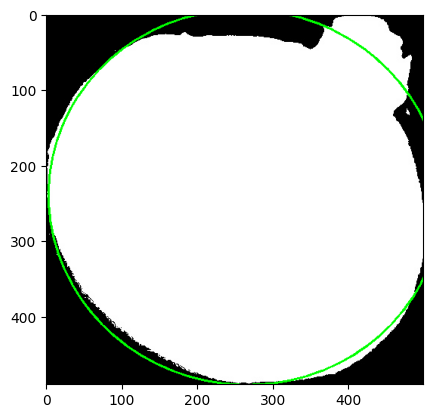

In [4]:
#最も長い直径,最も短い直径を求める
import cv2
import numpy as np
import matplotlib.pyplot as plt

# マスク画像の読み込み
mask_path = "/home/data/1216_jikuari/maskBB/C/IMG_1734.JPEG"  # マスク画像のパス
mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# 輪郭を抽出
contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 楕円フィッティング
if len(contours) > 0:
    contour = max(contours, key=cv2.contourArea)  # 最大の輪郭を選択
    if len(contour) >= 5:  # 楕円フィッティングには少なくとも5点が必要
        ellipse = cv2.fitEllipse(contour)
        (xc, yc), (major_axis, minor_axis), angle = ellipse
        print(f"長軸（最長径）: {major_axis},:{major_axis/72}cm")
        print(f"短軸（最短径）: {minor_axis},:{minor_axis/72}cm")
        print(f"中心: ({xc}, {yc}), 角度: {angle}度")
        
        # 楕円を画像に描画
        output_img = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2BGR)
        cv2.ellipse(output_img, ellipse, (0, 255, 0), 2)
        
        # 結果を表示
        plt.imshow(output_img)
    else:
        print("楕円フィッティングには輪郭点が少なすぎます。")
else:
    print("輪郭が見つかりませんでした。")


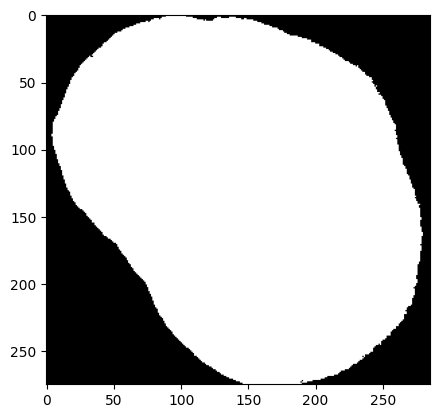

In [1]:
#実験
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

image = cv2.imread("/home/data/1008/mask/IMG_1635.jpg", cv2.IMREAD_COLOR)
_, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

plt.imshow(image)

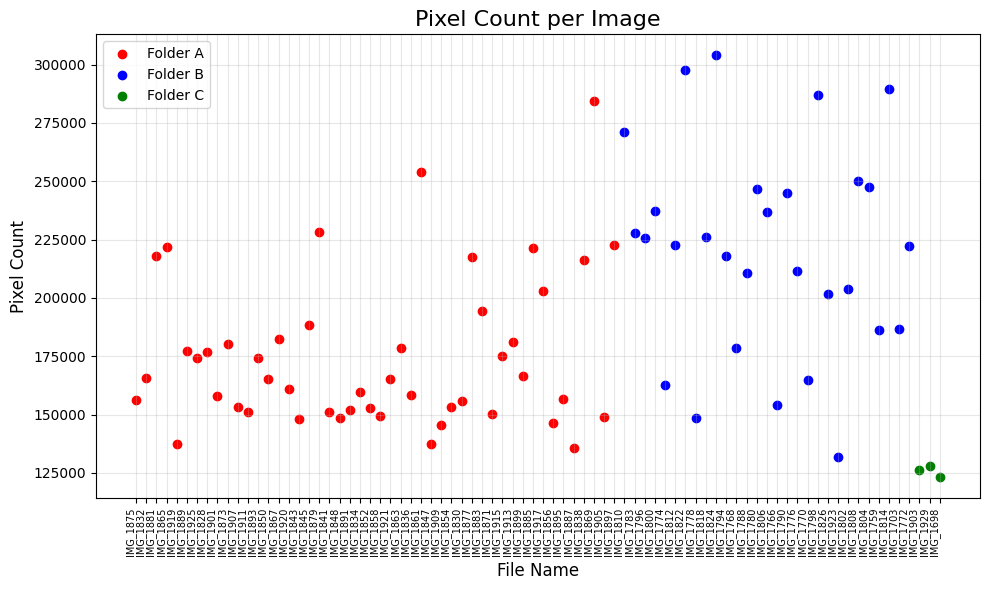

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# データフォルダの設定
date = "0108_size"
input_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
# フォルダごとのプロットの色設定
colors = ['red', 'blue', 'green']
labels = ['Folder A', 'Folder B', 'Folder C']

plt.figure(figsize=(10, 6))  # グラフサイズ

for input_folder, color, label in zip(input_folders, colors, labels):
    results = []
    file_names = []
    folder_names = []
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            name = os.path.basename(file).replace(".JPEG", "")
            file_path = os.path.join(input_folder, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 二値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            # 白ピクセルのカウント
            count = np.sum(image == 255)
            results.append(count)
            file_names.append(name)
            folder_names.append(input_folder.split("/")[-1])
    
    # 散布図をプロット
    plt.scatter(file_names, results, color=color, label=label)

# グラフの装飾
plt.title("Pixel Count per Image", fontsize=16)
plt.xlabel("File Name", fontsize=12)
plt.ylabel("Pixel Count", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=7)  # ファイル名を回転して見やすく
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフを表示
plt.show()


Number of files in each folder:
Folder A: 48 files
Folder B: 29 files
Folder C: 3 files


/tmp/ipykernel_1487206/3272807984.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=evaluation_df, x='Folder', y='Pixel Count', palette="Set2")


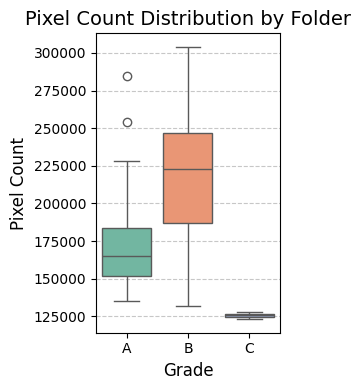

In [17]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データフォルダの設定
date = "0108_size"
input_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
# フォルダラベル設定
labels = ['A', 'B', 'C']

# データフレーム用のリスト
data = []

# 各フォルダのファイル数を記録する辞書
file_counts = {}

# データ収集
for label, input_folder in zip(labels, input_folders):
    count_files = 0  # ファイル数カウント用
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            count_files += 1  # ファイル数をカウント
            file_path = os.path.join(input_folder, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 二値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            # 白ピクセルのカウント
            count = np.sum(image == 255)
            # データフレーム用に保存
            data.append({"Folder": label, "Pixel Count": count})
    # 各フォルダのファイル数を記録
    file_counts[label] = count_files

# ファイル数を表示
print("Number of files in each folder:")
for folder, count in file_counts.items():
    print(f"Folder {folder}: {count} files")

# データフレーム作成
evaluation_df = pd.DataFrame(data)

# 箱ひげ図の描画
plt.figure(figsize=(3, 4))
sns.boxplot(data=evaluation_df, x='Folder', y='Pixel Count', palette="Set2")
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Pixel Count", fontsize=12)
plt.title("Pixel Count Distribution by Folder", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# グラフを表示
plt.show()


/tmp/ipykernel_1487206/3229599588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=evaluation_df, x='Folder', y='Pixel Count', palette="Set2")


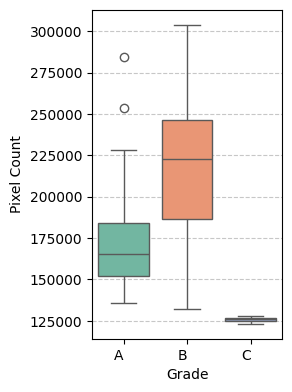

In [18]:
plt.figure(figsize=(3, 4))  # コンパクトなサイズ
sns.boxplot(data=evaluation_df, x='Folder', y='Pixel Count', palette="Set2")
plt.xlabel("Grade", fontsize=10)  # 文字サイズを少し小さく
plt.ylabel("Pixel Count", fontsize=10)
# plt.title("Pixel Count Distribution by Folder", fontsize=12)
plt.xticks( ha='right')  # ラベルの回転角度を控えめに
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=1)  # 余白を最小化
plt.savefig("plot.png", dpi=300)  # 高解像度で保存
plt.show()


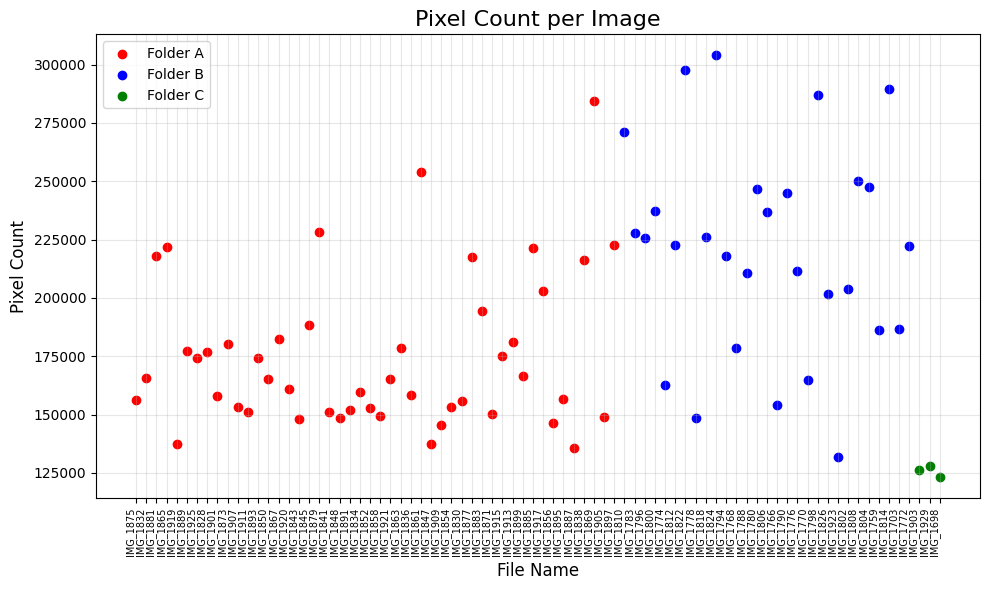

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# データフォルダの設定
date = "0108_size"
input_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
# フォルダごとのプロットの色設定
colors = ['red', 'blue', 'green']
labels = ['Folder A', 'Folder B', 'Folder C']

plt.figure(figsize=(10, 6))  # グラフサイズ

for input_folder, color, label in zip(input_folders, colors, labels):
    results = []
    file_names = []
    folder_names = []
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            name = os.path.basename(file).replace(".JPEG", "")
            file_path = os.path.join(input_folder, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 二値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            # 白ピクセルのカウント
            count = np.sum(image == 255)
            results.append(count)
            file_names.append(name)
            folder_names.append(input_folder.split("/")[-1])
    
    # 散布図をプロット
    plt.scatter(file_names, results, color=color, label=label)

# グラフの装飾
plt.title("Pixel Count per Image", fontsize=16)
plt.xlabel("File Name", fontsize=12)
plt.ylabel("Pixel Count", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=7)  # ファイル名を回転して見やすく
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフを表示
plt.show()


In [6]:
#計測
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.perf_counter()
# データフォルダの設定
date = "0203_energee_after"
input_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
labels = ['Folder A', 'Folder B', 'Folder C']
for input_folder, label in zip(input_folders, labels):
    results = []
    file_names = []
    folder_names = []
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            name = os.path.basename(file).replace(".JPEG", "")
            file_path = os.path.join(input_folder, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 二値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            # 白ピクセルのカウント
            count = np.sum(image == 255)
            results.append(count)
            file_names.append(name)
            folder_names.append(input_folder.split("/")[-1])
    
end = time.perf_counter()
print(f"Runtime: {end - start:.6f} seconds")

Runtime: 0.036691 seconds


In [35]:
from scipy.stats import mannwhitneyu
import itertools  # 組み合わせ生成のため

# データフォルダの設定
date = "0108_size"
input_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
# フォルダごとのラベル設定
labels = ['Folder A', 'Folder B', 'Folder C']

# 各フォルダの白ピクセル数を保存するリスト
folder_results = []

plt.figure(figsize=(10, 6))  # グラフサイズ

# データの収集とプロット
for input_folder, label in zip(input_folders, labels):
    results = []
    file_names = []
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            name = os.path.basename(file).replace(".JPEG", "")
            file_path = os.path.join(input_folder, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 二値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
            # 白ピクセルのカウント
            count = np.sum(image == 255)
            results.append(count)
            file_names.append(name)
    
    # 各フォルダのデータを保存
    folder_results.append(results)

# Mann-Whitney U検定: 全ての組み合わせ
folder_combinations = list(itertools.combinations(range(len(folder_results)), 2))

print("=== Mann-Whitney U Test Results ===")
for idx1, idx2 in folder_combinations:
    data1 = folder_results[idx1]
    data2 = folder_results[idx2]
    label1 = labels[idx1]
    label2 = labels[idx2]
    
    # Mann-Whitney U検定
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    
    # 結果を出力
    print(f"{label1} vs {label2}:")
    print(f"  統計量 (U): {stat}")
    print(f"  p値: {p}")
    if p < 0.05:
        print("  → 有意差があります")
    else:
        print("  → 有意差はありません")
    print()


=== Mann-Whitney U Test Results ===
Folder A vs Folder B:
  統計量 (U): 284.0
  p値: 1.5179319496772348e-05
  → 有意差があります

Folder A vs Folder C:
  統計量 (U): 144.0
  p値: 9.603841536614646e-05
  → 有意差があります

Folder B vs Folder C:
  統計量 (U): 87.0
  p値: 0.0004032258064516129
  → 有意差があります



<Figure size 1000x600 with 0 Axes>

In [22]:
sorted_results = sorted(zip(file_names, results, folder_names), key=lambda x: x[1])
print(sorted_results)


[('IMG_1923', 131888, 'B'), ('IMG_1778', 148590, 'B'), ('IMG_1766', 154151, 'B'), ('IMG_1774', 162490, 'B'), ('IMG_1770', 164777, 'B'), ('IMG_1768', 178318, 'B'), ('IMG_1759', 186247, 'B'), ('IMG_1703', 186765, 'B'), ('IMG_1826', 201757, 'B'), ('IMG_1802', 203882, 'B'), ('IMG_1788', 210611, 'B'), ('IMG_1776', 211730, 'B'), ('IMG_1794', 218044, 'B'), ('IMG_1772', 222353, 'B'), ('IMG_1812', 222634, 'B'), ('IMG_1796', 225740, 'B'), ('IMG_1818', 226253, 'B'), ('IMG_1783', 227781, 'B'), ('IMG_1806', 236808, 'B'), ('IMG_1800', 237448, 'B'), ('IMG_1790', 244764, 'B'), ('IMG_1780', 246488, 'B'), ('IMG_1804', 247523, 'B'), ('IMG_1808', 250185, 'B'), ('IMG_1810', 270911, 'B'), ('IMG_1798', 287144, 'B'), ('IMG_1814', 289466, 'B'), ('IMG_1822', 297861, 'B'), ('IMG_1824', 303929, 'B')]


In [ ]:


# Mann-Whitney U検定
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"U統計量: {stat}, p値: {p}")

if p < 0.05:
    print("有意差があります")
else:
    print("有意差はありません")